Feature selection is one of the core concepts in ML which hugely impacts the performance of the model. The data features you used to train your models have a huge influence on the performance you can achieve.  

Feature Selection is the process where you automatically or manually select those features which **contribute most to your prediction variable or output in what you are interested in**.  Irrelevant or partially relevant features can negatively impact model performance, that means it may  make the model learn based on irrelevant features, then make wrong decision, then decrease the accuracy of the models.  


#### Benefits of performing feature selection before modeling the data:  

1. Reduce Overfitting  
2. Improve Accuracy  
3. Reduce Training time  

#### Feature selection methods  

1. Univariate Selection  
2. Feature Importance  
3. Correlation Matrix with Heatmap

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv('mobile_price_train.csv')
X = data.iloc[:, 0:20]
y = data.iloc[:, -1]

# chi-test is the popular feature selection methods
# use chi-square to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [6]:
# 10 best features
featureScores.nlargest(10, 'Score')

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [7]:
# feature importance gives a score for each feature of the data
# feature importance is an inbuilt class that comes with tree based classifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
X = data.iloc[:, 0:20]
y = data.iloc[:, -1]
model = RandomForestClassifier()
model.fit(X, y)
model.feature_importances_

/Users/helena/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


array([0.06972147, 0.00490372, 0.02349921, 0.00665333, 0.02090249,
       0.00705389, 0.03602453, 0.02136645, 0.03667051, 0.01841179,
       0.02463295, 0.0508984 , 0.0575674 , 0.51996981, 0.02781673,
       0.02483777, 0.02913391, 0.00545053, 0.00645563, 0.00802949])

In [35]:
feats = {}
for feature,importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index')
importances.columns = ['importance']
importances = importances.sort_values(by='importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index':'features'})
importances

,features,importance
0,ram,0.519970
1,battery_power,0.069721
2,px_width,0.057567
3,px_height,0.050898
4,mobile_wt,0.036671
5,int_memory,0.036025
6,talk_time,0.029134
7,sc_h,0.027817
8,sc_w,0.024838
9,pc,0.024633


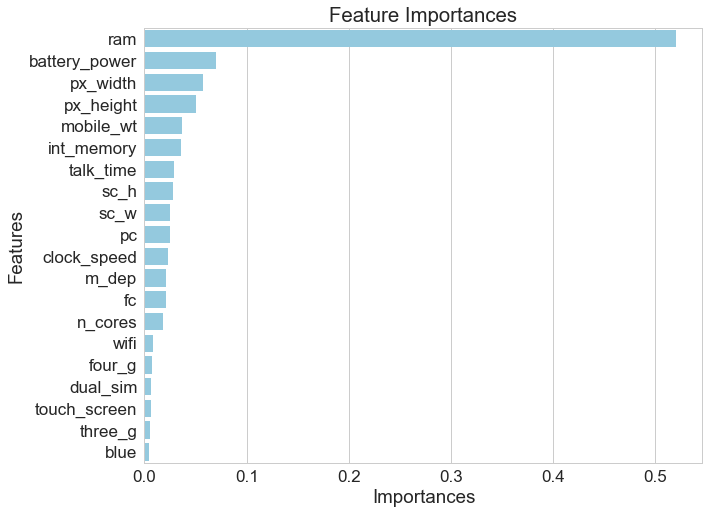

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=5)
sns.set(style='whitegrid', color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.barplot(x=importances['importance'], y = importances['features'], 
            data= importances, color='skyblue')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

Correlation states how the **features are related to each other or the target variable**.  Correlation can be positive (increase in one value of feature increases the value of the target variables) or negative (increase in one value of feature decreases the value of the target variables)

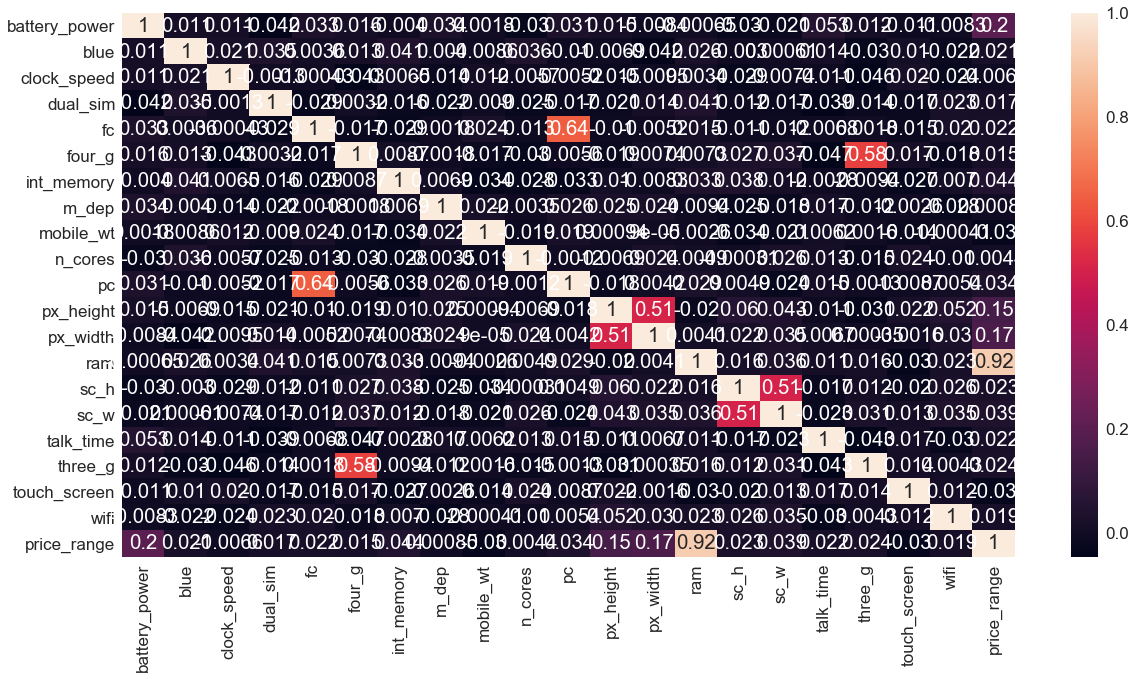

In [43]:
# correlation matrix with heatmap
X = data.iloc[:, 0:20]
y = data.iloc[:, -1]
# get correlations of each feature in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
sns.set(font_scale=5)
sns.set(style='whitegrid', color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
g = sns.heatmap(data[top_corr_features].corr(), annot=True)
